# Basic Statistics for Anopheles Families

Author: Mark Forteza

This notebook contains very basic exploration of the data set for Anopheles families. The scripts in this notebook uses the object ```'data'``` of type ```DataSet``` defined in the GitHub folder named ```/scripts/structures```.

In [1]:
#Python preamble
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

#Load the DataSet object named data
%run -i ../scripts/structures/main.py ../data/gene_families/ALL_GENE_file

In [2]:
#Hiding the scripts
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Simple statistics

We generate some basic statistics regarding this data set. For each of the properties examined, we will try to produce a a subset of the ```'DataSet.familiesDict'``` dictionary that we can use later.


In [24]:
print("The data set used contains", len(data.genesDict), "genes.")

The data set used contains 183680 genes.


### No duplication

These are gene families that contain no more than one gene per species. Output: ```'noDuplicationDict'```.

In [5]:
noDuplicationList = []
for f in data.familiesDict:
    currentFamily = data.familiesDict[f]
    noDup = True
    #We want every index of familyMembersArr to have at most 1 element
    for species in currentFamily.familyMembersDict:   
        if len(currentFamily.familyMembersDict[species]) > 1:
            noDup = False
            break
    if noDup == True:
        noDuplicationList.append(f)

noDuplicationDict = data.subset(noDuplicationList)

In [6]:
print('The number of families is:',len(data.familiesDict))
print('The number of families with no duplication is:',len(noDuplicationDict))

The number of families is: 14940
The number of families with no duplication is: 11271


We see that most gene families have no duplication, but roughly 1 in 5 families do contain duplicates. This suggests that gene duplication is uncommon but not a very rare event.


### Appears in all species

These are gene families which has a member in all species. Output: ```'inAllSpeciesDict'```

In [7]:
inAllSpeciesList = []
for f in data.familiesDict:
    currentFamily = data.familiesDict[f]
    allSpecies = True
    #We want every index of familyMembersArr to be non empty
    for species in currentFamily.familyMembersDict:   
        if len(currentFamily.familyMembersDict[species]) <1:
            allSpecies = False
            break
            
    if allSpecies == True:
        inAllSpeciesList.append(f)

inAllSpeciesDict = data.subset(inAllSpeciesList)

In [8]:
print('The number of families is:',len(data.familiesDict))
print('The number of families appearing in all species is:',len(inAllSpeciesDict))

The number of families is: 14940
The number of families appearing in all species is: 4130


Less than 1/3 of the gene families appear in all species. Later on, we will examine families which appear in very few species. It may be worthwhile to examine if some of the remaining families could be combined.

### Has exactly one gene in each species

These families satisfy both of the previous properties. They appear in all species and has no duplication. Output: ```'onePerSpeciesDict'```

In [10]:
onePerSpeciesList = []
for f in data.familiesDict:
    if f in noDuplicationDict and f in inAllSpeciesDict:
            onePerSpeciesList.append(f)

onePerSpeciesDict = data.subset(onePerSpeciesList)

print('The number of families is:',len(data.familiesDict))
print('The number of families which has exactly one gene in each species is:',len(onePerSpeciesDict))

The number of families is: 14940
The number of families which has exactly one gene in each species is: 2542


### Appears in 1,2 or 3 species only

Now we look for families which only appear in 1,2 or 3 species. 

In [12]:
oneSpeciesList = []
twoSpeciesList = []
threeSpeciesList = []
for f in data.familiesDict:
    currentFamily = data.familiesDict[f]
    numSpecies = 0
    for species in currentFamily.familyMembersDict:   
        if len(currentFamily.familyMembersDict[species]) > 0:
            numSpecies += 1            
    
    if numSpecies == 1:
        oneSpeciesList.append(f)
    elif numSpecies == 2:
        twoSpeciesList.append(f)
    elif numSpecies == 3:
        threeSpeciesList.append(f)
        
        
oneSpeciesDict = data.subset(oneSpeciesList)
twoSpeciesDict = data.subset(twoSpeciesList)
threeSpeciesDict = data.subset(threeSpeciesList)

fewSpeciesDict = {**onePerSpeciesDict,**twoSpeciesDict,**threeSpeciesDict} 

In [13]:
print('The number of families is:',len(data.familiesDict))
print('The number of families with one species is:',len(oneSpeciesDict))
print('The number of families with two species is:',len(twoSpeciesDict))
print('The number of families with three species is:',len(threeSpeciesDict))

The number of families is: 14940
The number of families with one species is: 3
The number of families with two species is: 2159
The number of families with three species is: 1103


The following are the 3 gene families which appears in only one species. We may want to examine each of these families closely to see if they could be combined. 

In [14]:
for f in oneSpeciesDict:
    data.printFamily(f)

Anopheles_arabiensis	KB704559	MZ22530522	AARA007213	-	46720	48018	2	46720-47189:47628-48018	
Anopheles_arabiensis	KB704898	MZ22530522	AARA012060	+	1204	1602	2	1204-1293:1354-1602	

Anopheles_funestus	KB668967	MZ22529460	AFUN011763	-	9732	10430	2	9732-10280:10383-10430	
Anopheles_funestus	KB669084	MZ22529460	AFUN012043	+	50698	51139	2	50698-50996:51028-51139	

Anopheles_melas	AXCO01016265	MZ22529468	AMEC003876	+	243	1628	3	243-346:435-1170:1245-1628	
Anopheles_melas	KI430195	MZ22529468	AMEC008190	+	13286	14213	2	13286-13389:13478-14213	



It is interesting to see that even though these families appear in only one species, all of them are duplicates in their respective species. Also, they are formatted with an extra ```'\n'``` at the end of each line for some reason.

### Further investigation of numebr of species per family

Using the interactive tools of ipython notebook, let us find families with exactly ```x``` number of species, where ```x``` is variable.

In [15]:
from ipywidgets import interact

@interact(x=(1,18))

def xSpeciesList(x):
    xSpeciesList = []

    for f in data.familiesDict:
        currentFamily = data.familiesDict[f]
        numSpecies = 0
        for species in currentFamily.familyMembersDict:   
            if len(currentFamily.familyMembersDict[species]) > 0:
                numSpecies += 1
                
        if numSpecies == x:
            xSpeciesList.append(f)
    
    print('The number of families with exactly',x,'species are:',len(xSpeciesList))
    
#    return xSpeciesDict
## we would like to return the array but without printing it


The number of families with exactly 9 species are: 332


We may want to return the subset of families with ```x``` number of species. I currently don't know how to do this. We graph this distribution below.

In [16]:
speciesPerFamList = []

for f in data.familiesDict:
    currentFamily = data.familiesDict[f]
    numSpecies = 0
    for species in currentFamily.familyMembersDict:   
        if len(currentFamily.familyMembersDict[species]) > 0:
            numSpecies += 1 
        
    speciesPerFamList.append(numSpecies)

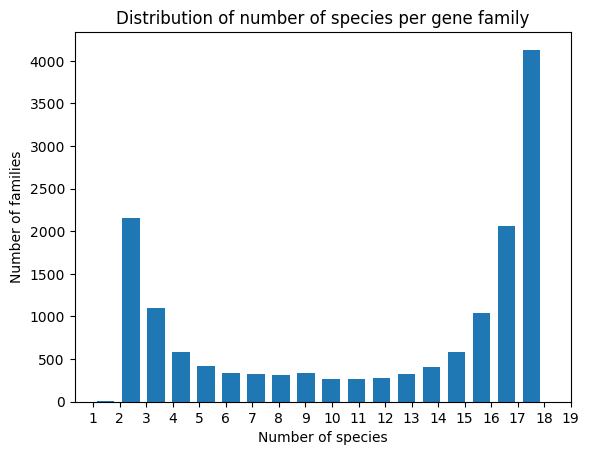

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.hist(speciesPerFamList, bins=18, rwidth=.7) #try not to hardcode this
ax.set_xticks(list(range(1,20)))
ax.set_xlabel('Number of species')
ax.set_ylabel('Number of families')
ax.set_title('Distribution of number of species per gene family')

plt.show()


It is interesting to see that the distribution has a "cup" shape. Most families either appear in very few or very many species. We know familes with only one species exist from the previous experiments, but there's only 3 of them so they're difficult to see on the graph. Diverging from the pattern further increases suspicion that these families may have errors. There are also a lot of families which appear in all species. The number is about double the next highest bin. I may be possible to split some of these families into smaller families.

## Families per Species

The following is a graph of the number of gene families for each species. Note that many of these families appear in multiple species.

In [18]:
familyPerSpeciesDict = {}   #dictionary indexed by speciesName with values number of families with that species
for s in data.speciesDict:
    familyPerSpeciesDict[s] = 0
    

for f in data.familiesDict:
    currentFamily = data.familiesDict[f]
    for species in currentFamily.familyMembersDict:   
        if len(currentFamily.familyMembersDict[species]) > 0:
            familyPerSpeciesDict[species] += 1 

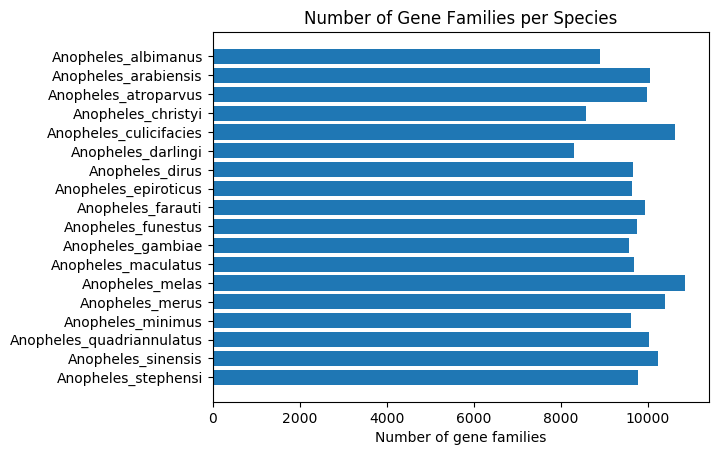

In [19]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(list(range(len(familyPerSpeciesDict))),familyPerSpeciesDict.values())
ax.set_yticks(list(range(len(familyPerSpeciesDict))))
ax.set_yticklabels(familyPerSpeciesDict.keys())
ax.invert_yaxis()
ax.set_xlabel('Number of gene families')
ax.set_title('Number of Gene Families per Species')

plt.show()

Some species have a lot less families than others. 